Chapter 7 - Moving Beyond Linearity, Question 10

In [2]:
library(ISLR)
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

## (a)

In [6]:
train = sample(1:nrow(College)%/%2)
length(names(College))

[1] 18

In [79]:
library(leaps)
regfit.forward = regsubsets(Outstate~.,data=College,nvmax=18,method="forward")
regfit_summary = summary(regfit.forward)
regfit_summary

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = College, nvmax = 18, 
    method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 17
Selection Algorithm: forward
          PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 )  " "        " "  " "    " "    " "       " "       " "        
2  ( 1 )  "*"        " "  " "    " "    " "       " "  

In [13]:
names(regfit_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

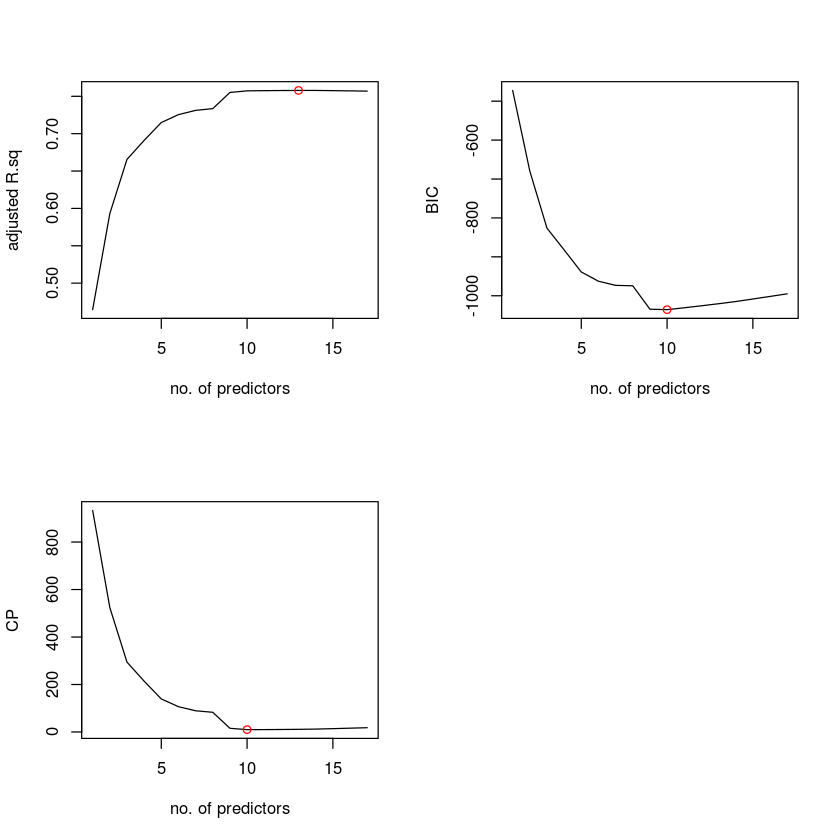

In [69]:
par(mfrow=c(2,2))
plot(regfit_summary$adjr2,type="l",ylab="adjusted R.sq", xlab="no. of predictors")
max_adjr2 = which.max(regfit_summary$adjr2)
points(max_adjr2,regfit_summary$adjr2[max_adjr2],col="red")
plot(regfit_summary$bic,type="l",ylab="BIC", xlab="no. of predictors")
min_bic = which.min(regfit_summary$bic)
points(min_bic,regfit_summary$bic[min_bic],col="red")
plot(regfit_summary$cp,type="l",ylab="CP", xlab="no. of predictors")
min_cp = which.min(regfit_summary$cp)
points(min_cp,regfit_summary$cp[min_cp],col="red")

In [70]:
k=10
folds = sample(1:k,nrow(College),replace=TRUE)

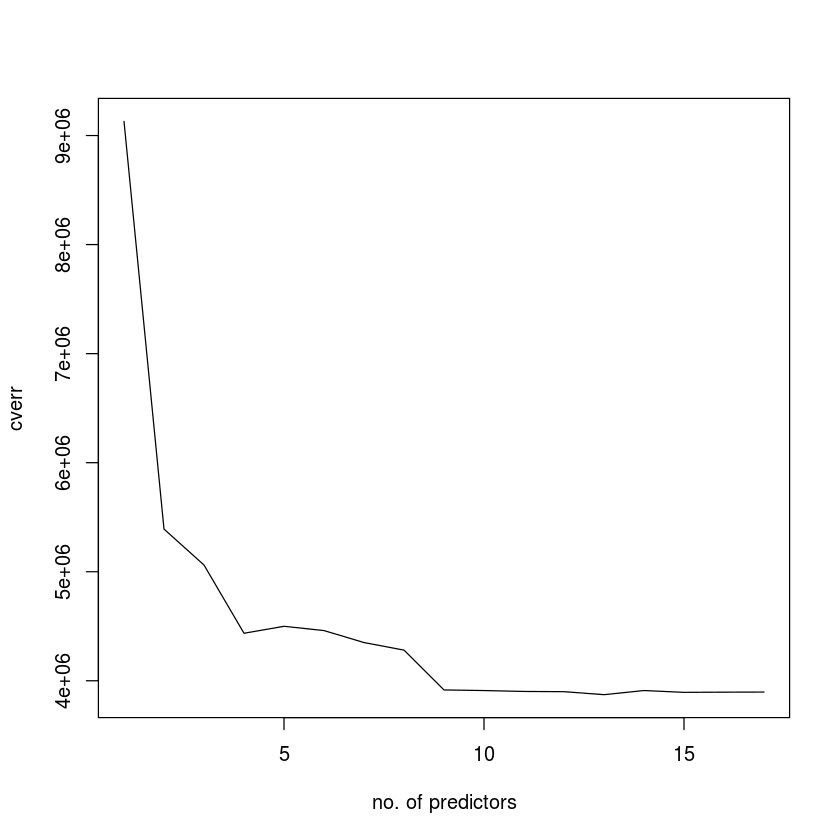

In [75]:
set.seed(1)
cverr = c()
for(i in 1:17){
    err = c()
    for(j in 1:k){
        regfit_model = regsubsets(Outstate~.,data=College[folds!=k,],method="forward")
        test_mat = model.matrix(Outstate~.,data=College[folds==k,])
        coef_vec = coef(regfit.forward,id=i)
        n = names(coef_vec)
        pred = test_mat[,n]%*%coef_vec
        err[j]=mean((pred-College[folds==k,]$Outstate)^2)
    }
    cverr[i]=mean(err)
}
plot(cverr,type="l",xlab="no. of predictors")

In [76]:
which.min(cverr)

[1] 13

According to 10-fold cross validation error the model with 13 predictors give the lowest mean squared error. However the results of CP and BIC favor 10 predictors. In the cross validation graph we can observe that the difference between the mean squared error of the model with 10 predictors and the model with 13 predictors is insignificant. Therefore for the simplification of the model we choose 10 predictors. 

In [80]:
coef(regfit.forward,id=10)

(Intercept)    PrivateYes        Accept    Room.Board      Personal 
-2.089123e+03  2.799835e+03  8.088453e-02  8.845143e-01 -3.616074e-01 
          PhD      Terminal     S.F.Ratio   perc.alumni        Expend 
 1.874875e+01  2.324435e+01 -6.183241e+01  4.377470e+01  1.950640e-01 
    Grad.Rate 
 2.653995e+01

## (b)

In [81]:
names(College)

[1] "Private"     "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"

In [100]:
library(gam)
library(splines)
gam.model = gam(Outstate~Private+s(Accept,df=3)+s(Room.Board,df=3)+s(Books,df=3)+s(Personal,df=3)+s(PhD,df=3)+
                s(S.F.Ratio,df=3)+s(perc.alumni,df=3)+s(Expend,df=3)+s(Grad.Rate,df=3), data=College[train,])

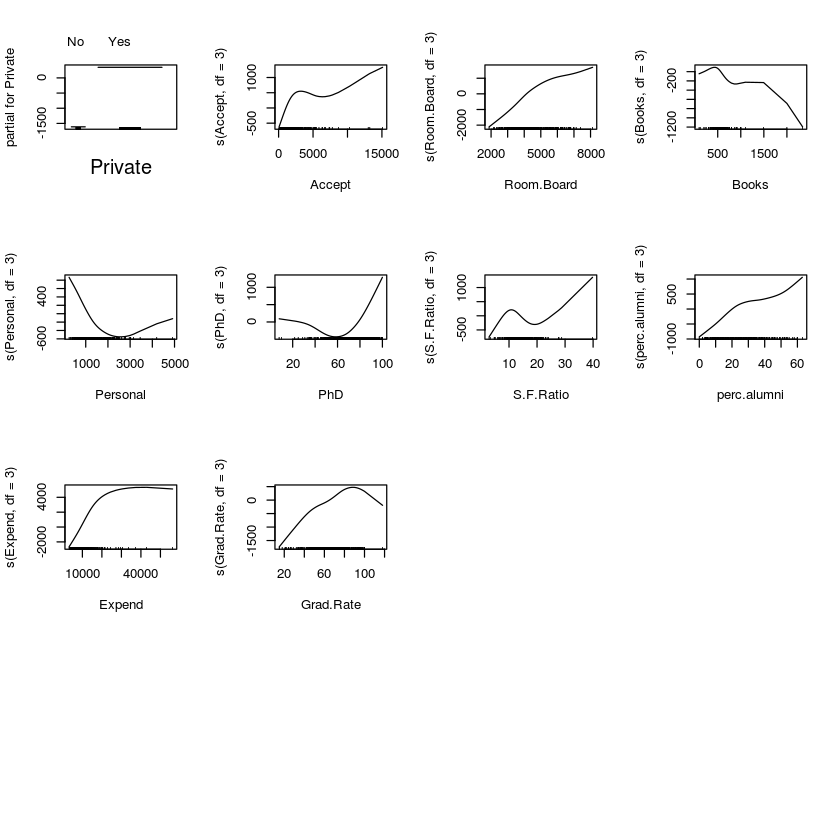

In [101]:
par(mfrow=c(4,4))
plot(gam.model)

## (c)

In [105]:
pred = predict(gam.model,newdata=College[-train,])

In [106]:
#R-squared
TSS = sum((College[-train,]$Outstate-mean(College[-train,]$Outstate))^2)
RSS = sum((College[-train,]$Outstate-pred)^2)
1-RSS/TSS

[1] 0.7735546

## (d)

In [104]:
summary(gam.model)


Call: gam(formula = Outstate ~ Private + s(Accept, df = 3) + s(Room.Board, 
    df = 3) + s(Books, df = 3) + s(Personal, df = 3) + s(PhD, 
    df = 3) + s(S.F.Ratio, df = 3) + s(perc.alumni, df = 3) + 
    s(Expend, df = 3) + s(Grad.Rate, df = 3), data = College[train, 
    ])
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-6580.46 -1091.51    52.66  1149.57  7208.44 

(Dispersion Parameter for gaussian family taken to be 3141810)

    Null Deviance: 12341942890 on 775 degrees of freedom
Residual Deviance: 2346929754 on 746.9992 degrees of freedom
AIC: 13841.84 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                        Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private                  1 2004051580 2004051580 637.865 < 2.2e-16 ***
s(Accept, df = 3)        1  817929953  817929953 260.337 < 2.2e-16 ***
s(Room.Board, df = 3)    1 1887004403 1887004403 600.611 < 2.2e-16 ***
s(Books, df = 3)         1   39064708   39064708  12.434 

According to the ANOVA for the Nonparametric Effect Accept, PhD, S.F. Ratio and Expend have a strong non-linear relationship with the response